## Importing Libraries

In [8]:
from selenium import webdriver
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg

## Initializing WebDriver

In [9]:
driver = webdriver.Chrome(executable_path="chromedriver.exe")
driver.maximize_window()
driver.implicitly_wait(30)


In [10]:
## Defining screenshot function
def screenCap():
    millis = int(round(time.time() * 1000))
    imgName=millis
    driver.save_screenshot('Screens/'+"test"+str(imgName)+".png")
    img=mpimg.imread('Screens/'+"test"+str(imgName)+".png")
    imgplot = plt.imshow(img)
    plt.show()

## 1.1 Logging into Instagram

In [11]:
def do_Login(username,password):
    driver.get('https://www.instagram.com/accounts/login/')
    driver.find_element_by_name("username").send_keys(username)
    driver.find_element_by_name("password").send_keys(password)
    driver.find_element_by_xpath("//*[text()='Log In']").click()
    screenCap()

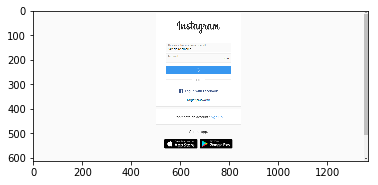

In [12]:
import time
do_Login("Sample Username","Sample Password")
time.sleep(3)

## Notification warning Ignore

In [13]:
driver.find_element_by_xpath("//*[text()='Not Now']").click()

## 2.1 Search Account , Ex- Food for all food accounts
* This function will return all the account names from search results

In [14]:
def searchAndPrint(searchText):
    driver.find_element_by_xpath("//*[@placeholder='Search']").clear()
    driver.find_element_by_xpath("//*[@placeholder='Search']").send_keys(searchText)
    screenCap()
    time.sleep(3)
    ele=driver.find_element_by_xpath("//*[@class='fuqBx']")
    results=ele.find_elements_by_tag_name("a")
    l=[]
    for i in results:
        #Excluding Hashtags
        if "#" not in i.text:
            l.append(i.text.partition('\n')[0])
            print(i.text.partition('\n')[0],end=" , ")
            

## Calling searchAndPrint

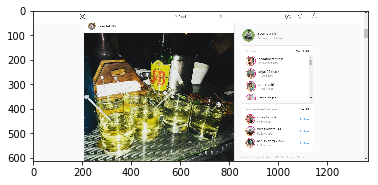

foodconnectionbymadhulika , _ashu_foodie , foodtalkindia , food_travel_diaries_ , foodie_bumble , foodfoodtv , food , foodie_extrodinaire_ , foodie_of_india , foodbloggerai , foodgasm_foodiecouple , bengal_foodquest , foodiechefs , foodtravelpedia_ , fooddiesdiary , fooderages , foodhack.i , foodiee__kudii , foodblogger.2 , zestyy_foodie , fitgirlkane , foodiewithluv , the_messy_vegetarian_foodie , richa.sharma2 , _the_lost_foodie , foodie_bharat , foodie_rushil , thegirlinphulkari , footprintsonfoodworl , foodrush.recipe , foodnstuff.co , foodstagram__official , foodie_article , foodpandit , foodfoodhotahai , foodndestinations , foodmorich , food_vibes8 , foodiesince96 , foodie_incarnate , dillifoodjunkie , foodyvid , relatedtofood , delhifoodwalks , foodie_crush14 , foodlikedaily , thebongfooddiaries , delhifoodguide , theavgfoodie , posto.food , thevividtraveller , foodrambling_ , foodrad , foodie_yaaaaashu , foodie_pranami_ , Fun N Food Village , food_ii_eat , kalpitadeshmukh , the

In [15]:
searchAndPrint("food")

## 3.1 Search And Open Any Profile 

In [149]:
def searchAndOpenProfile(profileName):
    driver.find_element_by_xpath("//*[@placeholder='Search']").clear()
    driver.find_element_by_xpath("//*[@placeholder='Search']").send_keys(profileName)
    time.sleep(3)
    screenCap()
    ele=driver.find_element_by_xpath("//*[@class='fuqBx']")
    results=ele.find_elements_by_tag_name("a")
    for i in results:
        if "#" not in i.text:
            i.click()
            print(i.text.partition('\n')[0]+" Profile Opened")
            plt.show()
            break;
    

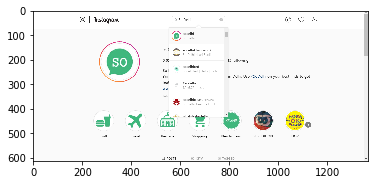

sodelhi Profile Opened


In [151]:
# Sample run on So delhi
searchAndOpenProfile("So Delhi")

## 4.1-2 Follow Handle

In [152]:
def followHandle(handleName):
    driver.get("https://www.instagram.com")
    searchAndOpenProfile(handleName)
    time.sleep(3)
    ## To verify whether an element exists or not , ie follow button, if exists then click
    if len(driver.find_elements_by_xpath("//*[text()='Follow']"))>0:
        driver.find_element_by_xpath("//*[text()='Follow']").click()
        print("Started following the Handle")
    else:
        print("Already following this handle")

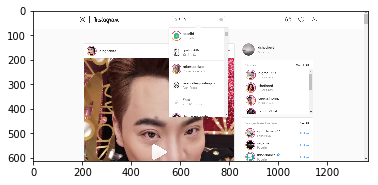

sodelhi Profile Opened
Started following the Handle


In [153]:
followHandle("So Delhi")

## 4.1-3 Unfollow Handle

In [12]:
def unfollowHandle(handleName):
    driver.get("https://www.instagram.com")
    searchAndOpenProfile(handleName)
    time.sleep(3)
    ## To verify whether an element exists or not 
    if len(driver.find_elements_by_xpath("//*[text()='Follow']"))==0:
        driver.find_element_by_xpath("//*[text()='Following']").click()
        driver.find_element_by_xpath("//*[text()='Unfollow']").click()
        print("Unfollowed the Handle")
    else:
        print("Handle is already unfollowed")

In [13]:
unfollowHandle("So Delhi")

sodelhi
Profile Opened
Unfollowed the Handle


## 5.1 Like n number of Posts of Any Handle

In [154]:
def likePosts(handleName,numberOfPosts):
    driver.get("https://www.instagram.com")
    searchAndOpenProfile(handleName)
    time.sleep(3)
    driver.find_element_by_class_name("_9AhH0").click()
    ## To verify whether an element exists or not 
    if len(driver.find_elements_by_xpath("//span[@aria-label='Like']"))>0:
        driver.find_element_by_xpath("//span[@aria-label='Like']").click()
        print("Post number 1 liked")
        screenCap()
        
    else:
        print("Post number 1 is already liked")
        #Screenshot on 1st post
        screenCap()
    # For rest of the posts
    for i in range(numberOfPosts-1):
        if len(driver.find_elements_by_xpath("//*[text()='Next']"))>0:
            driver.find_element_by_xpath("//*[text()='Next']").click()
            time.sleep(2)
            if len(driver.find_elements_by_xpath("//span[@aria-label='Like']"))>0:
                time.sleep(1)
                driver.find_element_by_xpath("//span[@aria-label='Like']").click()
                print("Post number "+str(i+2)+" liked")
            else:
                print("Post number "+str(i+2)+" is already liked")
        else:
            break
    time.sleep(2)
    driver.find_element_by_xpath("//*[text()='Close']").click()
    

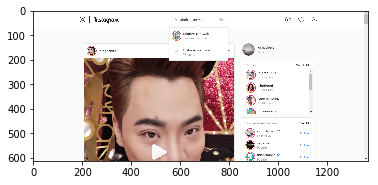

calories_can_wait Profile Opened
Post number 1 liked


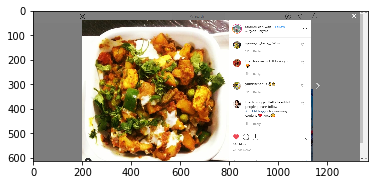

Post number 2 liked
Post number 3 liked


In [155]:
likePosts("calories_can_wait",3)

## 5.2 Unlike n number of Posts of Any Handle

In [13]:
def unlikePosts(handleName,numberOfPosts):
    driver.get("https://www.instagram.com")
    searchAndOpenProfile(handleName)
    time.sleep(3)
    driver.find_element_by_class_name("_9AhH0").click()
    if len(driver.find_elements_by_xpath("//span[@aria-label='Unlike']"))>0:
        driver.find_element_by_xpath("//span[@aria-label='Unlike']").click()
        print("Post number 1 unliked")
    else:
        print("Post number 1 is already unliked")
    for i in range(numberOfPosts-1):
        if len(driver.find_elements_by_xpath("//*[text()='Next']"))>0:
            driver.find_element_by_xpath("//*[text()='Next']").click()
            time.sleep(2)
            if len(driver.find_elements_by_xpath("//span[@aria-label='Unlike']"))>0:
                driver.find_element_by_xpath("//span[@aria-label='Unlike']").click()
                print("Post number "+str(i+2)+" unliked")
            else:
                print("Post number "+str(i+2)+" is already unliked")
        else:
            break
    time.sleep(1)
    driver.find_element_by_xpath("//*[text()='Close']").click()
    

In [17]:
unlikePosts("soumyansh gupta",28)

## 6.1 Extract followers of any account

In [14]:
def followersList(handleName,numberOfFollowers):
    driver.get("https://www.instagram.com")
    searchAndOpenProfile(handleName)
    time.sleep(3)
    handle='/'+handleName+'/followers/'
    # Making dynamic xpath
    xpath="//*[@href='"+handle+"'"+']' 
    driver.find_element_by_xpath(xpath).click()
    time.sleep(2)
    i=0
    j=0
    while i<=numberOfFollowers+j:
        time.sleep(2)
        element=driver.find_element_by_xpath("//*[@class='PZuss']")
        results=element.find_elements_by_tag_name("a")
        
        x=[]
        for k in results:
            if k.text.strip()!='':
                x.append(k.text.strip())
        
        if (len(x)<numberOfFollowers):
            followerWindow = driver.find_element_by_xpath("//*[@class='isgrP']")
            elements=followerWindow.find_elements_by_tag_name("a")
            driver.execute_script("arguments[0].scrollIntoView();", elements[i])
            i=i+1
            j=j+1
        else:
        
            element_new=driver.find_element_by_xpath("//*[@class='PZuss']")
            results_new=element.find_elements_by_tag_name("a")
            l=[]
            count=0
            for r in results_new:
                if r.text.strip()!='':
                    count=count+1
                    l.append(r.text.strip())
                    if count==numberOfFollowers:
                        break
            print(l)
            break
                
        

In [15]:
followersList("sodelhi",5)

sodelhi
Profile Opened
['kanishq_besoya_dilli', '_ojasvi.sharma_', 'thecrazy_me_', 'foodntravelbuddies', 'mohit_choudhary_o777']


## 6.2 Followers of any Handle that you are following but those who don't follow you

In [35]:
def followUnfollow(ownHandleName,handleName):
    # List of your own followers
    driver.get("https://www.instagram.com")
    driver.find_element_by_xpath("//*[@aria-label='Profile']").click()
    time.sleep(3)
    handle='/'+ownHandleName+'/followers/'
    xpath="//*[@href='"+handle+"'"+']' 
    driver.find_element_by_xpath(xpath).click()
    time.sleep(2)
    element=driver.find_element_by_xpath("//*[@class='PZuss']")
    results=element.find_elements_by_tag_name("a")    
    x=[]
    for k in results:
        if k.text.strip()!='':
            x.append(k.text.strip())
    print("Your followers are ",x)
    
    # Extracting List of followers of given Handle which are getting followed by you
    time.sleep(2)
    driver.get("https://www.instagram.com")
    time.sleep(2)
    searchAndOpenProfile(handleName)
    handle='/'+handleName+'/followers/'
    xpath="//*[@href='"+handle+"'"+']' 
    driver.find_element_by_xpath(xpath).click()
    time.sleep(2)
    elements_new=driver.find_elements_by_xpath("//*[text()='Following']/../..")
    l=[]
    for j in elements_new:
        if j.text.strip()!='':
            l.append(j.text.split()[0].strip())
    print(handleName+" followers which are getting followed by you are ",l)
    followUnfollow_List=[]
    for i in l:
        if i not in x:
            followUnfollow_List.append(i)
    print("Followers of "+handleName+" that you are following but those who don't follow you are \n",followUnfollow_List)
        

In [36]:
followUnfollow("shashankgupta999","foodtalkindia")

Your followers are  ['sakib.husen.357', 'williamsantanna80', 'dinesh.jjha.93', 'mandeep4363', 'porwal46', 'jennigomez96']
foodtalkindia
Profile Opened
foodtalkindia followers which are getting followed by you are  ['travel.235', 'foodstar_foodlove']
Followers of foodtalkindia that you are following but those who don't follow you are 
 ['travel.235', 'foodstar_foodlove']


## 7. Story Viewer

In [156]:
def storyViewer(handleName):
    driver.get("https://www.instagram.com")
    time.sleep(3)
    searchAndOpenProfile(handleName)
    time.sleep(3)
    story=driver.find_element_by_class_name("CfWVH")
    
    if int(story.get_attribute("height"))==166:
        print("You have already seen the story")
    else:
        driver.find_element_by_class_name("_6q-tv").click()
        if(len(driver.find_elements_by_xpath("//*[text()='Close']"))>0):
            print("Viewing the story")
            time.sleep(2)
            screenCap()
        else:
            print("User has no story")

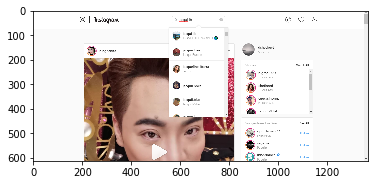

jacqui_ib Profile Opened
166
You have already seen the story


In [161]:
storyViewer("jacqui_ib")